In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
from sklearn.model_selection import GridSearchCV                    # To find best hyperparamter setting for the algorithm
from sklearn.tree import export_graphviz

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.shape

(200, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


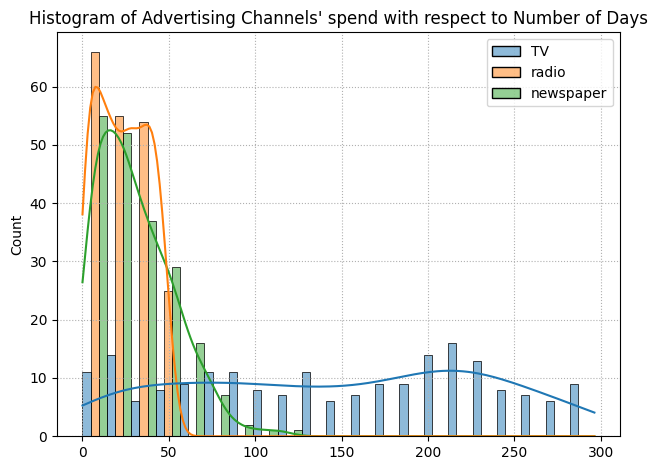

In [ ]:
sns.histplot(data.drop('sales',axis=1), multiple='dodge', kde=True, bins='auto')
plt.grid(linestyle=':')
plt.title("Histogram of Advertising Channels' spend with respect to Number of Days")
plt.tight_layout()

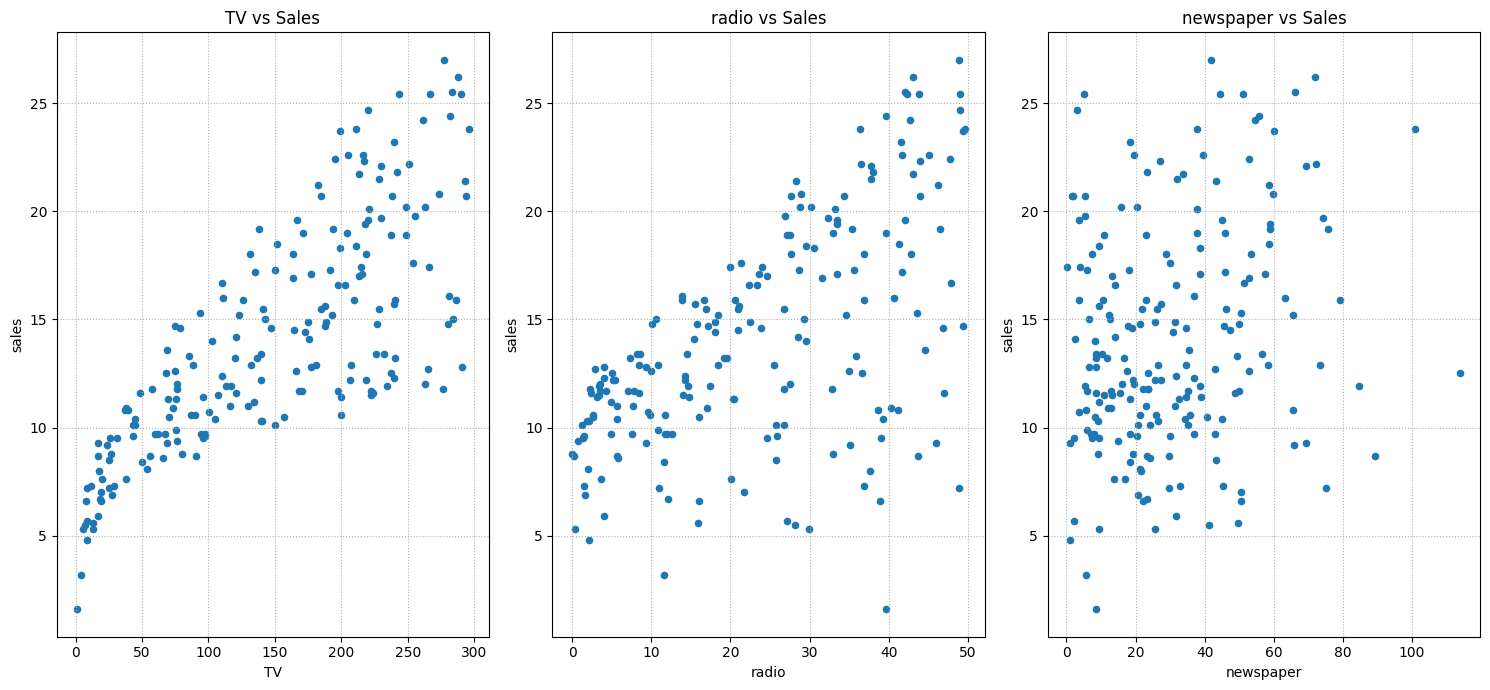

In [ ]:
fig, ax = plt.subplots(figsize=[15,7],ncols=3)
for i,v in enumerate(['TV', 'radio', 'newspaper']):
    data.plot.scatter(x=v, y='sales', ax=ax[i], title=f"{v} vs Sales")
    ax[i].grid(linestyle=':')
plt.tight_layout()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [ ]:
X = scaled_data.drop(labels=['sales'], axis=1)
y = scaled_data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('Train Data Shape: ', X_train.shape, y_train.shape)
print('Test Data shape: ', X_test.shape, y_test.shape)

Train Data Shape:  (160, 3) (160,)
Test Data shape:  (40, 3) (40,)


In [ ]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [ ]:
print('Training Accuracy: ', regressor.score(X_train, y_train))
print('Testing Accuracy: ', regressor.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9473681605092893


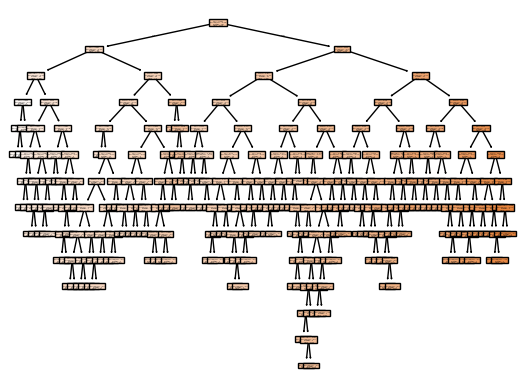

In [ ]:
plt.figure()
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()

### HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_depth' : [2,4,5,6,7,8,9,10,11,12,15,20,30]}
clf = GridSearchCV(regressor, param_grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,
                                       30]})

In [ ]:
clf.best_params_

{'max_depth': 7}

In [ ]:
regdt = clf.best_estimator_

In [ ]:
regdt

DecisionTreeRegressor(max_depth=7, random_state=42)

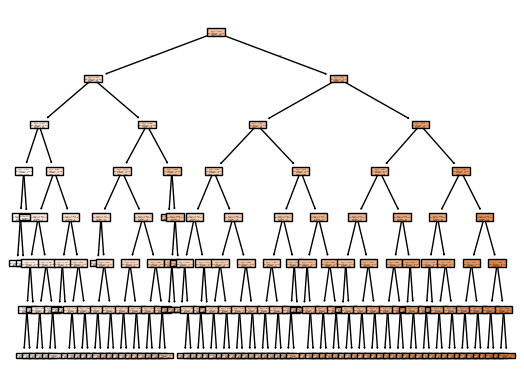

In [ ]:
plt.figure()
plot_tree(regdt, filled=True)
plt.show()

In [ ]:
print('Training Accuracy: ', clf.score(X_train, y_train))
print('Testing Accuracy: ', clf.score(X_test, y_test))

Training Accuracy:  0.9978074601832373
Testing Accuracy:  0.9474652612856228
